<h2>import used libraries</h2>

In [20]:
# This is only to read data and show it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<h2>Upload dataset</h2>

In [23]:
dataset = pd.read_csv('Mall_Customers.csv')
datacut = dataset.iloc[:, [3, 4]].values
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h3>Viewing annual income and spending score</h3>

Text(0, 0.5, 'Annual Income (k$)')

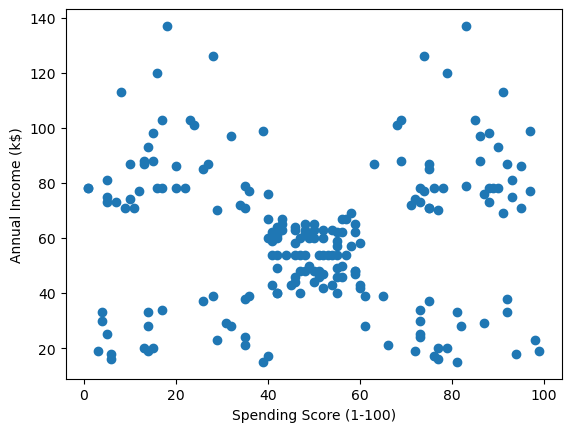

In [26]:
plt.scatter(dataset['Spending Score (1-100)'],dataset['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

<h2>exploring K using elbow method</h2>

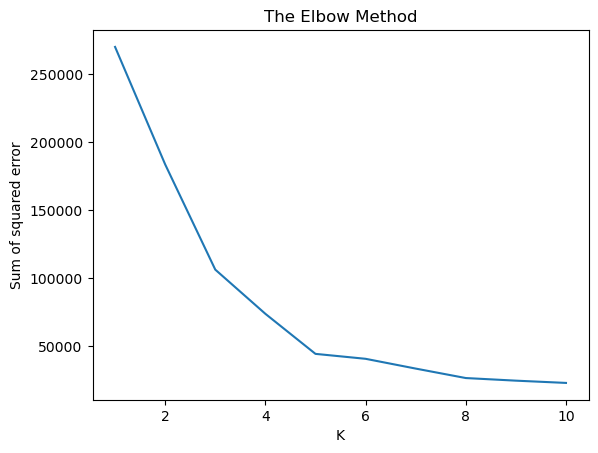

In [29]:
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning)

# Set the number of threads to 1 to avoid memory leak issue
os.environ["OMP_NUM_THREADS"] = "1"

# KMeans clustering and elbow method
sse = []
k_rng = range(1, 11)
for k in k_rng:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset[['Spending Score (1-100)', 'Annual Income (k$)']])
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.title("The Elbow Method")
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()


<h2>K mean model</h2>

In [32]:
kmeans = KMeans(n_clusters= k)
y_predicted = kmeans.fit_predict(dataset[['Spending Score (1-100)','Annual Income (k$)']])
y_predicted

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 1, 3, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 0, 9, 0, 8, 4, 9, 4, 9,
       0, 9, 4, 8, 4, 9, 4, 9, 4, 8, 0, 8, 4, 8, 0, 9, 4, 8, 4, 8, 4, 9,
       4, 8, 4, 9, 4, 9, 0, 8, 4, 8, 0, 9, 4, 8, 0, 9, 4, 9, 4, 8, 4, 8,
       4, 9, 4, 8, 0, 2, 7, 2, 0, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2,
       7, 2])

<h3>add cluster to table</h3>

In [35]:
dataset['cluster'] = y_predicted
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,3
4,5,Female,31,17,40,5


<h3>centroid  points</h3>

In [38]:
kmeans.cluster_centers_

array([[ 33.3       ,  81.3       ],
       [ 50.8125    ,  44.46875   ],
       [ 82.        , 109.7       ],
       [ 80.04761905,  25.0952381 ],
       [ 11.3       ,  79.6       ],
       [ 19.52380952,  25.14285714],
       [ 49.2244898 ,  60.26530612],
       [ 18.625     , 112.625     ],
       [ 90.46666667,  79.26666667],
       [ 73.28571429,  77.78571429]])

<h3>view k means cluster</h3>

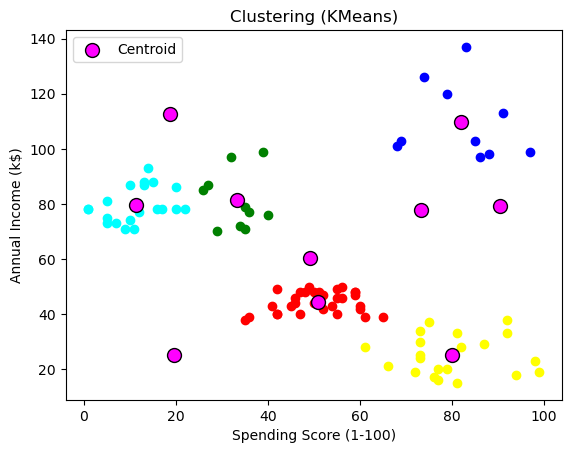

In [41]:
# To drow the scatter of the data with center points
dataset1 = dataset[dataset.cluster==0]
dataset2 = dataset[dataset.cluster==1]
dataset3 = dataset[dataset.cluster==2]
dataset4 = dataset[dataset.cluster==3]
dataset5 = dataset[dataset.cluster==4]
plt.scatter(dataset1['Spending Score (1-100)'],dataset1['Annual Income (k$)'],color='green')
plt.scatter(dataset2['Spending Score (1-100)'],dataset2['Annual Income (k$)'],color='red')
plt.scatter(dataset3['Spending Score (1-100)'],dataset3['Annual Income (k$)'],color='blue')
plt.scatter(dataset4['Spending Score (1-100)'],dataset4['Annual Income (k$)'],color='yellow')
plt.scatter(dataset5['Spending Score (1-100)'],dataset5['Annual Income (k$)'],color='cyan')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.title('Clustering (KMeans)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
#to show the box
plt.legend()  # OR plt.show()

<h2>Evaluate kmeans model</h2>

<h3>Silhouette Score aka Silhouette Coefficient</h3>

In [58]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(datacut, y_predicted)
silhouette_avg

0.448172196723079